In [2]:
import json
import glob
import numpy as np
import os
import mir_eval
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
trackid = 'StevenClark_Bounty'
with open("../../multif0_ismir2017/multitask_data/XY_pairs/{}_XY_pairs.json".format(trackid), 'r') as fhandle:
    data_dict = json.load(fhandle)
#     print(data_dict)

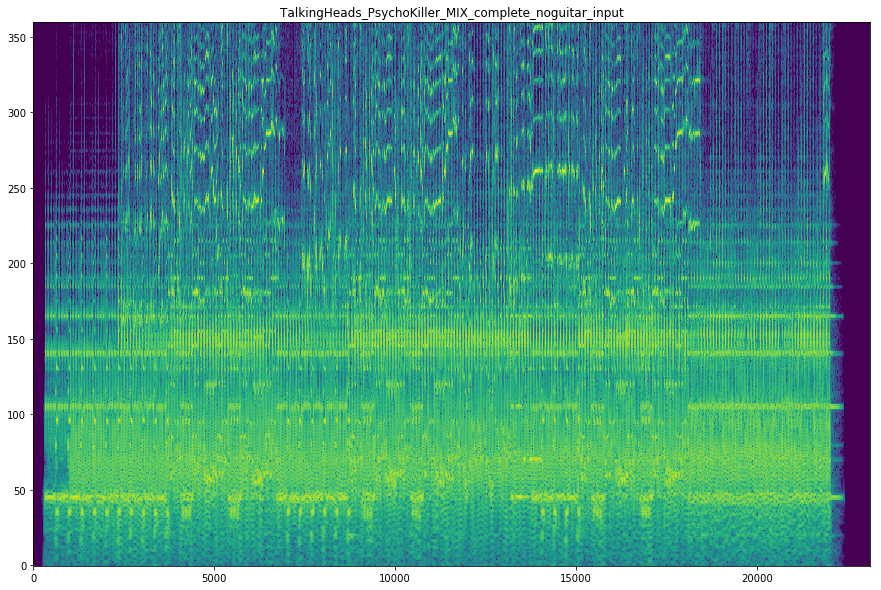

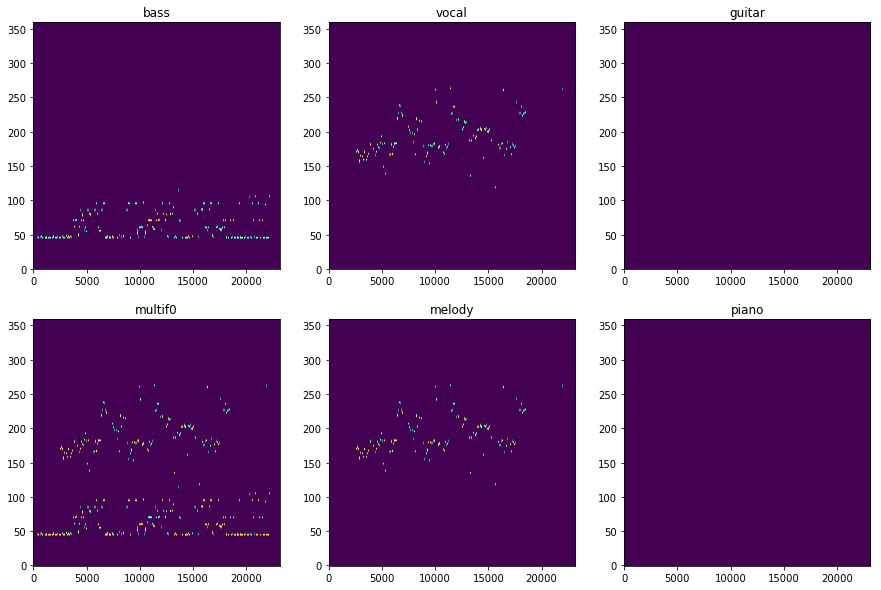

In [30]:
input_path = data_dict.keys()[0]

hcqt = np.load(input_path)
titles = []
data = []
for key in data_dict[input_path].keys():
    titles.append(key)
    data.append(np.load(data_dict[input_path][key]))

n_titles = len(titles)
n_cols = int(np.ceil((n_titles + 1)/2))
    
plt.figure(figsize=(15,10))
plt.imshow(hcqt[0], origin='lower')
plt.axis('tight')
suptitle = os.path.basename(input_path).split('.')[0]
plt.title(suptitle)
plt.savefig("../paper-figs/{}_input.png".format(suptitle), format='png', bbox_inches='tight')

plt.figure(figsize=(15,10))
i = 1
for title, dat in zip(titles, data):
    plt.subplot(2, n_cols, i)
    plt.imshow(dat, origin='lower')
    plt.axis('tight')
    plt.title(title)
    i = i + 1

plt.savefig("../paper-figs/{}_outputs.png".format(suptitle), format='png', bbox_inches='tight')



In [7]:
all_jsons = glob.glob(
    "../../multif0_ismir2017/multitask_data/XY_pairs/*.json")

In [17]:
n_melody = 0
n_bass = 0
n_vocal = 0
n_guitar = 0
n_piano = 0
n_multif0 = 0

for fpath in all_jsons:
    with open(fpath, 'r') as fhandle:
        dat = json.load(fhandle)
        print dat.keys()
        
#         for key in dat.keys():
#             if os.path.basename
#             print(dat[key].keys())

[u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/AmadeusRedux_SchubertMovement3_MIX_input.npy']
[u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/MusicDelta_80sRock_MIX_input.npy', u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/MusicDelta_80sRock_MIX_complete_nosynth_input.npy', u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/MusicDelta_80sRock_MIX_complete_noguitar_input.npy', u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/MusicDelta_80sRock_MIX_complete_resynth_input.npy']
[u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/ChrisJacoby_PigsFoot_MIX_input.npy']
[u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/Boston_MoreThanAFeeling_MIX_complete_nosynth_input.npy', u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/Boston_MoreThanAFeeling_MIX_input.npy', u'/scratch/rmb456/multif0_ismir2017/multitask_data/XY_pairs/Boston_MoreThanAFeeling_MIX_complete_resynth_input.npy', u'/scratch/rmb456/multif0_

/scratch/rmb456/MedleyDB_new/Audio/BillyIdol_WhiteWedding/BillyIdol_WhiteWedding_MIX.wav


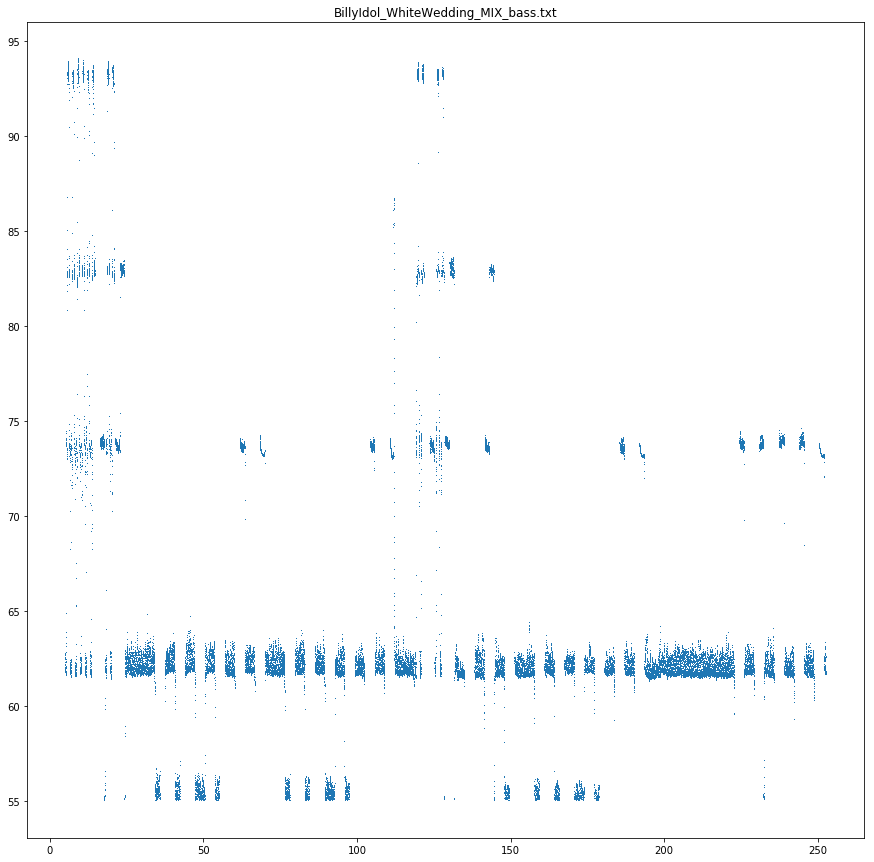

/scratch/rmb456/multif0_ismir2017/multitask_data/BillyIdol_WhiteWedding_MIX_complete_resynth.wav


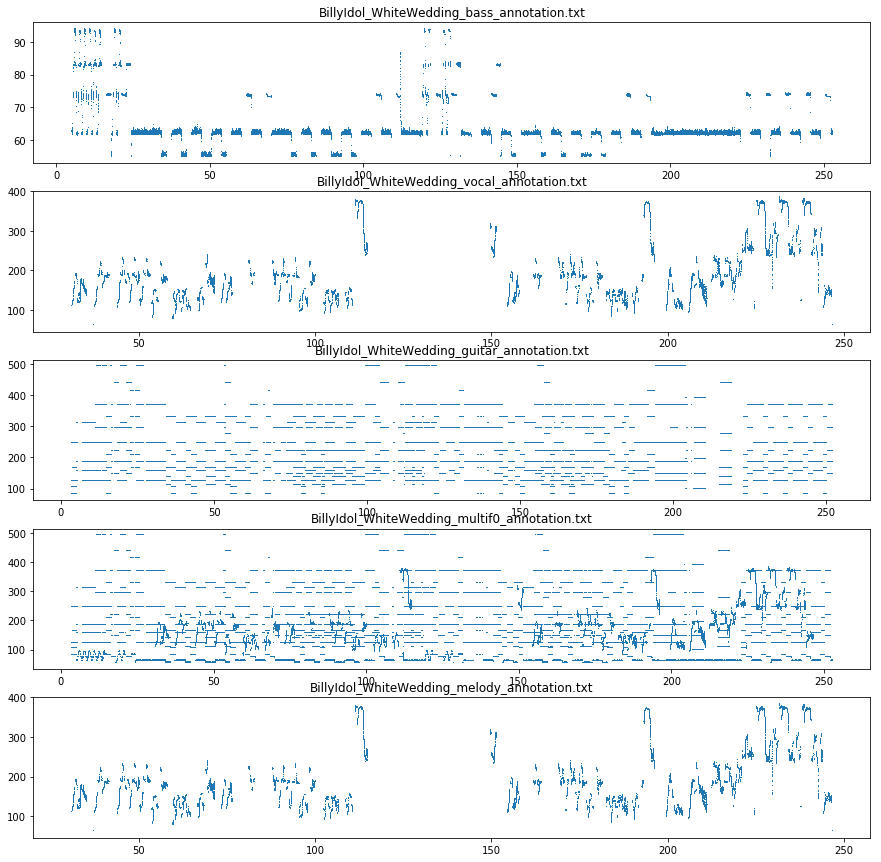

/scratch/rmb456/multif0_ismir2017/multitask_data/BillyIdol_WhiteWedding_MIX_complete_nosynth.wav


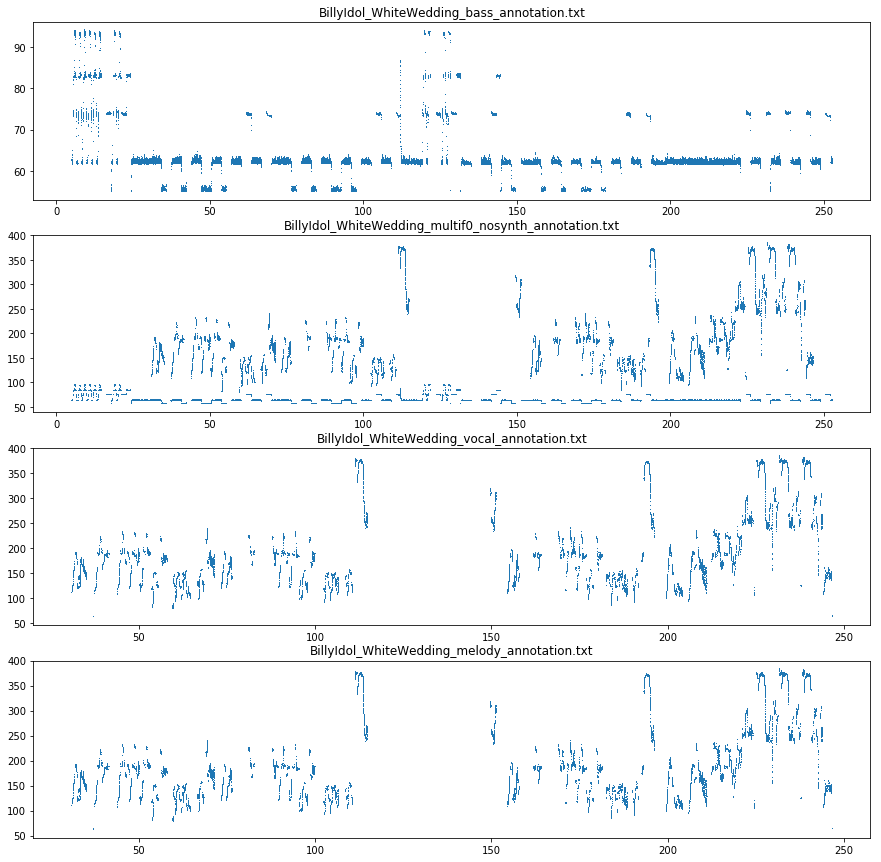

/scratch/rmb456/multif0_ismir2017/multitask_data/BillyIdol_WhiteWedding_MIX_complete_noguitar.wav


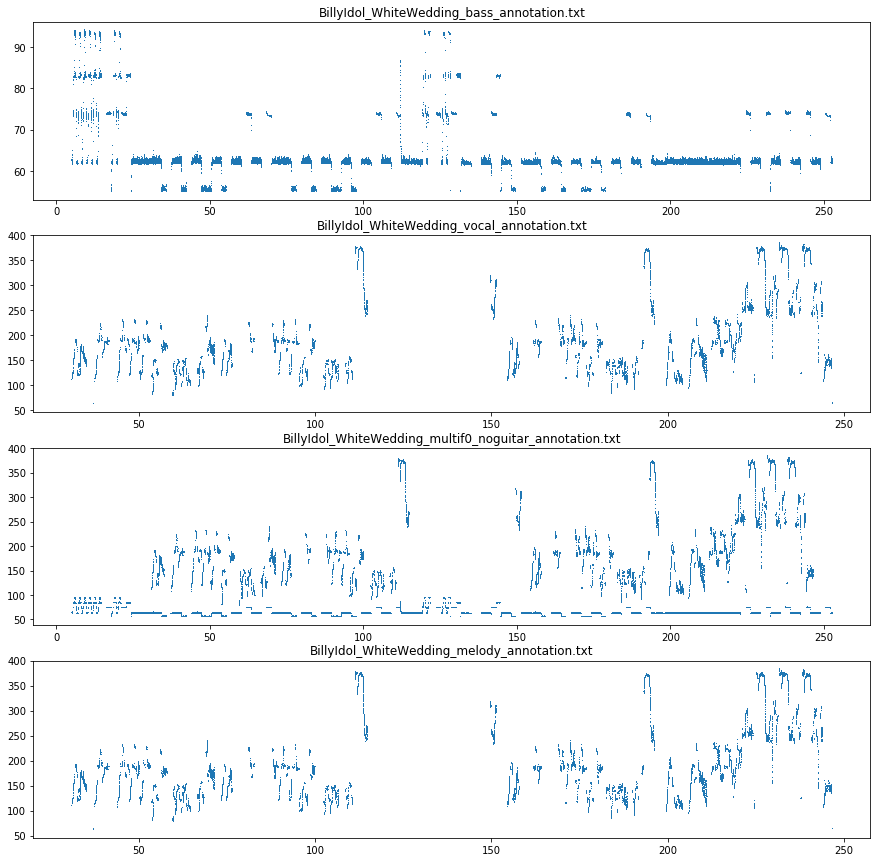

In [10]:
trackid = 'BillyIdol_WhiteWedding'
fpath = "../../multif0_ismir2017/multitask_data/{}_training_pairs.json".format(trackid)
with open(fpath, 'r') as fhandle:
    json_dat = json.load(fhandle)
    for audiofpath in json_dat.keys():
        plt.figure(figsize=(15, 15))
        print(audiofpath)
        txt_files = [f for f in json_dat[audiofpath].values() if f is not None]
#         print(txt_files)
        n_plots = len(txt_files)
        for i, txtpath in enumerate(txt_files):
            plt.subplot(n_plots, 1, i + 1)
            times, freqs = mir_eval.io.load_time_series(txtpath)
            plt.title(os.path.basename(txtpath))
            plt.plot(times, freqs, ',')
        plt.show()
# times, freqs = mir_eval.io.load(fpath)
